In [3]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import seaborn as sns
import matplotlib.pyplot as plt

# Loads data, does some cleaning and adds new colukmns "Weight Class" and "Age Group"

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
insurance_cleaned.head()


,Age,Sex,BMI,Children,Smoker,Region,Insurance Cost,Weight Class,Age Group
0,18,male,23.2,0,no,southeast,1121.87,Normal,Youth
1,18,male,30.1,0,no,southeast,1131.51,Obese,Youth
2,18,male,33.3,0,no,southeast,1135.94,Obese,Youth
3,18,male,33.7,0,no,southeast,1136.40,Obese,Youth
4,18,male,34.1,0,no,southeast,1137.01,Obese,Youth


In [4]:
# Start with df.describe() to get a general idea of the the values in the dataset.

insurance_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
BMI,1338.0,30.663303,6.098257,16.00,26.3000,30.40,34.700,53.10
Children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
Insurance Cost,1338.0,13270.422280,12110.011259,1121.87,4740.2875,9382.03,16639.915,63770.43


In [5]:
# We do not know the number of smokers and non-smokers, and the number of males and females yet. Let's find it out.

print("SMOKER COUNT:\n", insurance_cleaned['Smoker'].value_counts(),"\n\n")
print("NUMBER OF MALES AND FEMALES:\n", insurance_cleaned['Sex'].value_counts(),"\n\n")

SMOKER COUNT:
 no     1064
yes     274
Name: Smoker, dtype: int64 


NUMBER OF MALES AND FEMALES:
 male      676
female    662
Name: Sex, dtype: int64 




In [6]:
# We can see that the number of males is almost the same as the number of females. However, there are clearly many more non-smokers than people who smoke.

<AxesSubplot:xlabel='Weight Class', ylabel='count'>

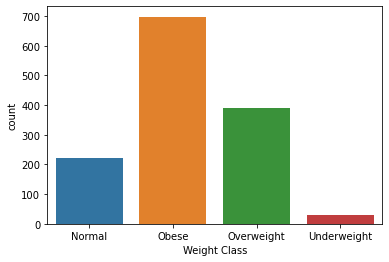

In [7]:
# After looking at the table from 'df.describe()', I have noticed that the average BMI is exceptionally high. 
# I would like to see the distribution of people in the different weight classes using the newly created column as my data and a count plot.

sns.countplot(x = insurance_cleaned["Weight Class"])

<AxesSubplot:xlabel='count', ylabel='Region'>

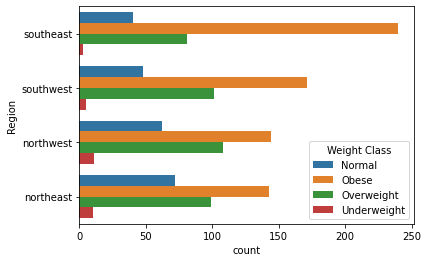

In [8]:
# We can see that the majority of the people fall under the "Overweight" or "Obese" category.
# This makes me wonder which region has the highest amount of "Overweight" or "Obese" people and which region comparatively has the healthiest people in terms of BMI.

sns.countplot(y = "Region", hue = "Weight Class", data = insurance_cleaned)

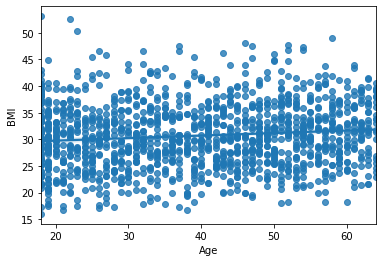

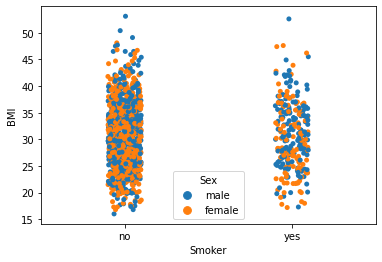

In [9]:
# We can see from the graphs above that the South-East region has the highest number of obese people, while the North-West region has the highest amount of Overweight people.
# People in the North-East are relatively the healthiest.

# Now I want to check what factors affect BMI and which one is causing it to be so high across all regions.
# I do this by creating graphs of suspected variables against BMI.

#Firstly, I check if Age is related to BMI using a scatter plot.

sns.regplot(x = "Age", y = "BMI", data = insurance_cleaned)
plt.show()

#Then, I check the BMI of smokers and non-smokers using a strip plot

sns.stripplot(x = 'Smoker', y = "BMI", data = insurance_cleaned, hue = 'Sex')
plt.show()

In [10]:
# Age and BMI seem to have little to no correlation to my disappointment. The regression line is almost horizontal.
# The strip plot has some interesting results; BMI doesn't seem to be affected by whether a person smokes or not since the distributions for both categories are almost similar.
# However, adding a hue pertaining to 'Sex' tells us that there are more men who smoke than women, and that there are more non-smokers than smokers in our dataset.
# This makes the higher-than-average BMI for the dataset even stranger and could mean that BMI is affected by factors that are not present in this dataset.

<AxesSubplot:>

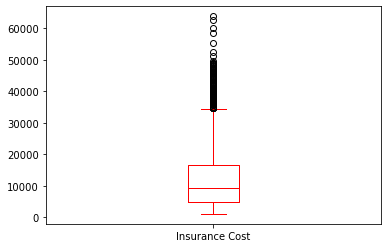

In [11]:
# One last thing that seems abnormal from the df.describe() we performed in the beginning is the standard deviation for the insurance cost.
# I want to check for outliers using a box plot on insurance cost.

insurance_cleaned["Insurance Cost"].plot(kind = "box", color = 'red')

In [12]:
# There are Many outliers as shown in the above box plot. Reasons behind outliers will be looked into in Task 5, where we answer our research questions.
